
# [2017-2020/03] Bay Wheels Ride Data Exploration and Visualization


## Introduction

Bay Wheels is a regional public cicyle sharing system in the San Francisco Bay Aea, operated by Motivate in a partnetship with the Metropolitan Transportation Commission and th Bay Area Air Quality Management District.

On June 28, 2017, the system officially re-launched as Ford GoBike in a partnership with Ford Motor Company. After Motivate's acquisition by Lyft, the system was subsequently renamed to Bay Wheels in June 2019.

Bay Wheels data is made accessible and usable by Lyft via the following link: https://www.lyft.com/bikes/bay-wheels/system-data

In this notebook, we will analyze data from January 2017 to March 2020. During this period, there were more than 5 million bicycle races in the San Francisco Bay Area.

In [4]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_clean = pd.read_csv('clean_data.csv')

## Distribution of trips during time

We would like to observe the evolution of trips over time. 
We can observe a decline in activity in December which corresponds to the holiday season and winter. We can also see that activity drops in the months of April, May and June for no apparent reason.

Text(0.5, 0, 'Months')

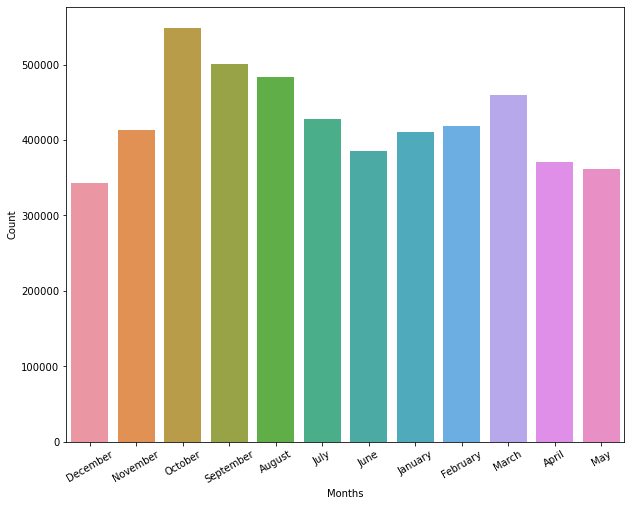

In [9]:
fig = plt.subplots(figsize = (10, 8))
sns.countplot(df_clean['start_time_month'])
plt.xticks (rotation = 30)
plt.ylabel('Count')
plt.xlabel('Months')

## Trip duration distribution between customers and subscribers

We would like to observe the duration of trips by type of users. Generally speaking, the activity is more or less the same depending on whether the user is a customer or a subscriber. There are synchronous decreases in the spring during the months of April, May and June and a decrease in the winter for the month of December. Howewer, there are some asynchronous months such as the month of March, which is very active for subscribers and not very active for customers.

Text(0, 0.5, 'Count')

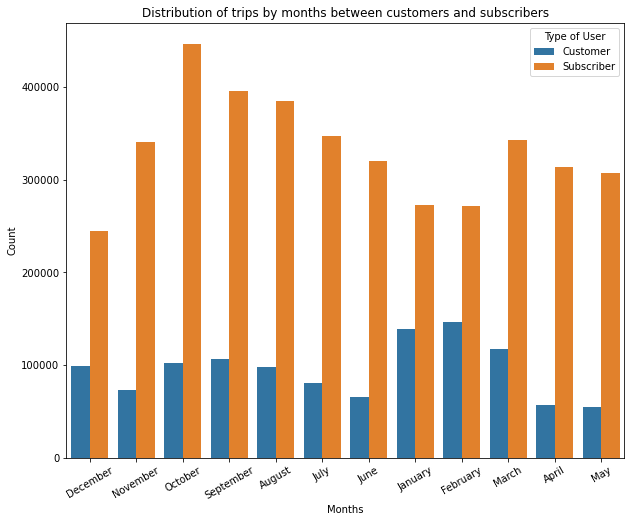

In [10]:
fig = plt.subplots(figsize = (10, 8))
sns.countplot(df_clean['start_time_month'], hue = df_clean['user_type'])
plt.xticks(rotation = 30)
plt.legend(title = 'Type of User')
plt.title('Distribution of trips by months between customers and subscribers')
plt.xlabel('Months')
plt.ylabel('Count')

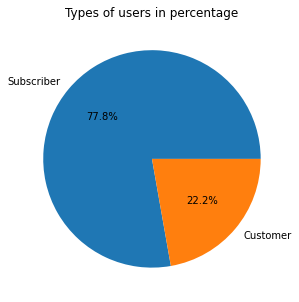

In [13]:
df_clean.user_type.value_counts().plot.pie(autopct = '%1.1f%%', figsize = (8, 5)) ; 
plt.title('Types of users in percentage')
plt.ylabel('')
plt.show()

## Duration of trips changes according to the type of user over the different months of the year ? 

We can observe that, on average, travel times are longer for subscribers than for customers. We can also observe that the different seasons of the year have little impact on the average travel time of customers. On the othe hand, the seasons have a strong impact on the use of subscribers. Thus, subscribers, move over longer periods in summer (increase from June to August) and less in winter (decrease from December to March).

Text(0.5, 1.0, 'Variation of trip duration during the months')

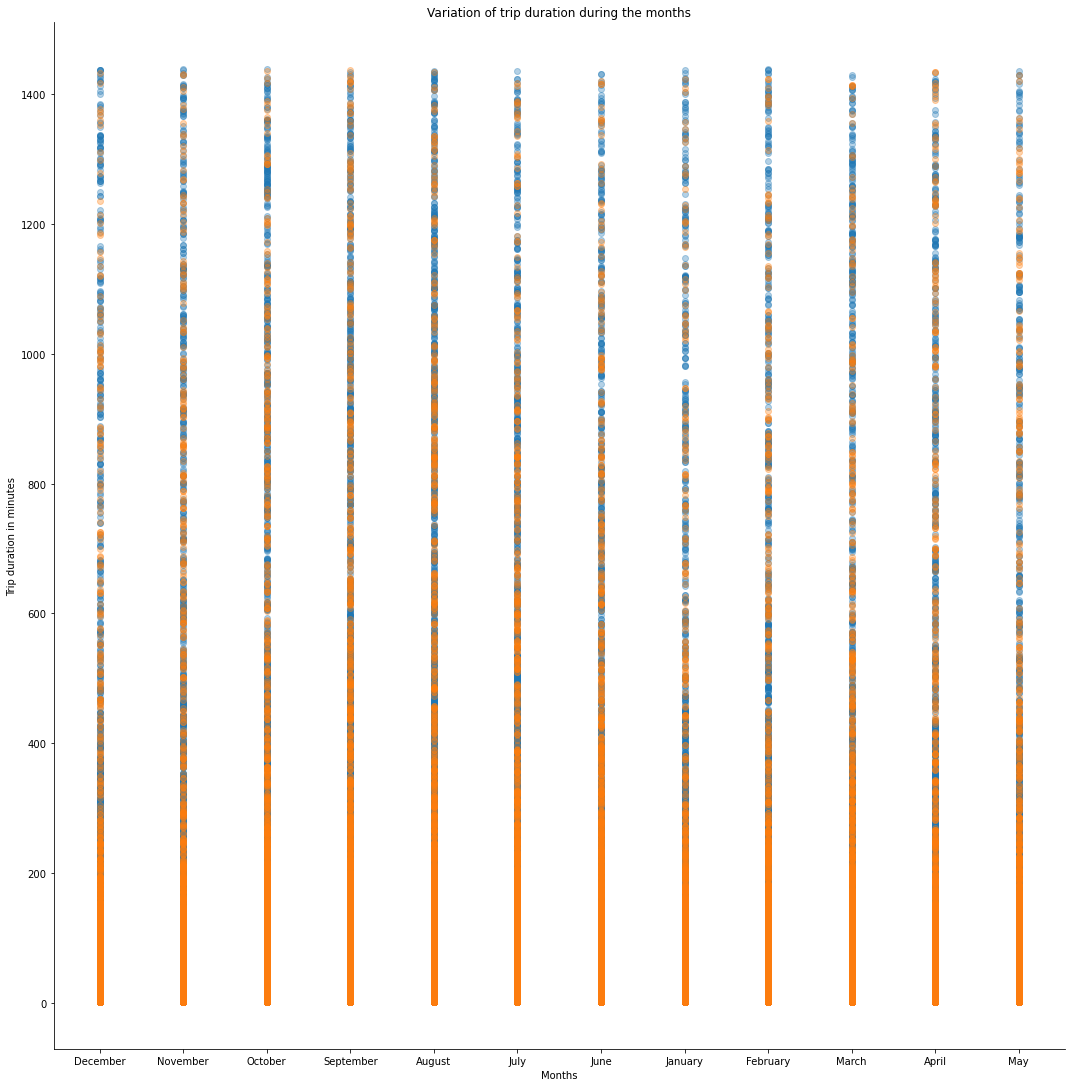

In [11]:
sns.FacetGrid(data = df_clean, hue = 'user_type', height = 15).map(plt.scatter, 'start_time_month', 'duration_min', alpha = 1/3)
plt.xlabel('Months')
plt.ylabel('Trip duration in minutes')
plt.title('Variation of trip duration during the months')

Text(0.5, 1.0, 'Variation of trip duration during the months')

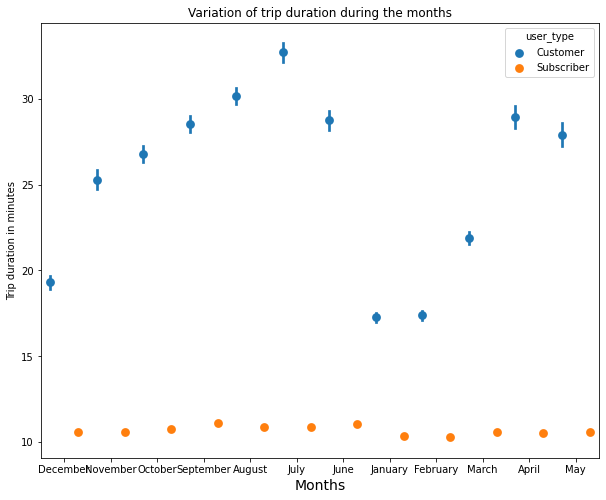

In [14]:
fig = plt.subplots(figsize = (10,8))
sns.pointplot(data = df_clean, x = 'start_time_month', y = 'duration_min', hue = 'user_type', dodge = 0.6, linestyles = '')
plt.xlabel('Months', fontsize = 14)
plt.ylabel('Trip duration in minutes')
plt.title('Variation of trip duration during the months')